In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Unzipping a file in Google Colabc
!unzip /content/drive/MyDrive/PJ/PJL/trainmodel.zip -d /content/drive/MyDrive/PJ/PJL


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PJ/PJL/dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.550773,0.669949,1.876273e-07,0.559471,0.604302,-0.107612,0.580410,0.523087,-0.116221,0.631656,...,0.665644,0.433270,0.037628,0.684302,0.465134,0.033082,0.664331,0.492933,0.042337,OFF_device_1
1,0.556612,0.677560,1.476664e-07,0.546126,0.596194,-0.102924,0.576754,0.508767,-0.104896,0.659555,...,0.710646,0.444050,0.051015,0.711075,0.474594,0.044810,0.685075,0.500853,0.054077,OFF_device_1
2,0.568988,0.674649,1.891311e-07,0.533293,0.594653,-0.084752,0.558381,0.506165,-0.099590,0.654605,...,0.739817,0.447461,0.019921,0.724060,0.474221,0.018892,0.696838,0.496464,0.030734,OFF_device_1
3,0.558226,0.674832,4.044514e-08,0.503316,0.601007,-0.064991,0.508355,0.509190,-0.080241,0.602895,...,0.737033,0.450224,-0.031717,0.705939,0.481013,-0.024512,0.673462,0.505523,-0.007543,OFF_device_1
4,0.547345,0.675786,-3.926624e-09,0.487259,0.602893,-0.063318,0.487279,0.509973,-0.082692,0.580376,...,0.722651,0.446014,-0.054423,0.690878,0.476134,-0.044534,0.659319,0.501009,-0.025362,OFF_device_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.423941,0.858230,9.551131e-07,0.309747,0.777752,-0.072751,0.298501,0.636587,-0.088488,0.438171,...,0.661093,0.509590,-0.062394,0.701813,0.449541,-0.084939,0.738448,0.396535,-0.101158,ON_device_5
2016,0.423927,0.863727,9.144583e-07,0.319234,0.781138,-0.076294,0.318570,0.641135,-0.095521,0.461997,...,0.675683,0.516847,-0.064245,0.716641,0.458844,-0.083310,0.751579,0.408388,-0.097174,ON_device_5
2017,0.422502,0.865163,9.751692e-07,0.320602,0.782025,-0.079578,0.325450,0.645655,-0.100279,0.472049,...,0.680184,0.520257,-0.071296,0.724348,0.462767,-0.092091,0.762193,0.411626,-0.106362,ON_device_5
2018,0.422792,0.850327,1.176928e-06,0.329203,0.769010,-0.085177,0.342789,0.635615,-0.108955,0.487961,...,0.687294,0.507600,-0.075879,0.733481,0.449763,-0.098311,0.773225,0.397733,-0.114389,ON_device_5


In [ ]:
df = df.rename(columns={  : 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.550773,0.669949,1.876273e-07,0.559471,0.604302,-0.107612,0.580410,0.523087,-0.116221,0.631656,...,0.665644,0.433270,0.037628,0.684302,0.465134,0.033082,0.664331,0.492933,0.042337,OFF_device_1
1,0.556612,0.677560,1.476664e-07,0.546126,0.596194,-0.102924,0.576754,0.508767,-0.104896,0.659555,...,0.710646,0.444050,0.051015,0.711075,0.474594,0.044810,0.685075,0.500853,0.054077,OFF_device_1
2,0.568988,0.674649,1.891311e-07,0.533293,0.594653,-0.084752,0.558381,0.506165,-0.099590,0.654605,...,0.739817,0.447461,0.019921,0.724060,0.474221,0.018892,0.696838,0.496464,0.030734,OFF_device_1
3,0.558226,0.674832,4.044514e-08,0.503316,0.601007,-0.064991,0.508355,0.509190,-0.080241,0.602895,...,0.737033,0.450224,-0.031717,0.705939,0.481013,-0.024512,0.673462,0.505523,-0.007543,OFF_device_1
4,0.547345,0.675786,-3.926624e-09,0.487259,0.602893,-0.063318,0.487279,0.509973,-0.082692,0.580376,...,0.722651,0.446014,-0.054423,0.690878,0.476134,-0.044534,0.659319,0.501009,-0.025362,OFF_device_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.423941,0.858230,9.551131e-07,0.309747,0.777752,-0.072751,0.298501,0.636587,-0.088488,0.438171,...,0.661093,0.509590,-0.062394,0.701813,0.449541,-0.084939,0.738448,0.396535,-0.101158,ON_device_5
2016,0.423927,0.863727,9.144583e-07,0.319234,0.781138,-0.076294,0.318570,0.641135,-0.095521,0.461997,...,0.675683,0.516847,-0.064245,0.716641,0.458844,-0.083310,0.751579,0.408388,-0.097174,ON_device_5
2017,0.422502,0.865163,9.751692e-07,0.320602,0.782025,-0.079578,0.325450,0.645655,-0.100279,0.472049,...,0.680184,0.520257,-0.071296,0.724348,0.462767,-0.092091,0.762193,0.411626,-0.106362,ON_device_5
2018,0.422792,0.850327,1.176928e-06,0.329203,0.769010,-0.085177,0.342789,0.635615,-0.108955,0.487961,...,0.687294,0.507600,-0.075879,0.733481,0.449763,-0.098311,0.773225,0.397733,-0.114389,ON_device_5


In [ ]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (2020, 63)
Labels shape = (2020,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [ ]:
y_pred = svm.predict(x_test)
y_pred

array(['OFF_device_5', 'ON_device_3', 'ON_device_5', 'OFF_device_2',
       'OFF_device_3', 'OFF_device_2', 'ON_device_2', 'OFF_device_5',
       'OFF_device_3', 'ON_device_4', 'OFF_device_2', 'OFF_device_1',
       'OFF_device_5', 'ON_device_1', 'ON_device_3', 'ON_device_3',
       'OFF_device_5', 'OFF_device_1', 'ON_device_3', 'OFF_device_3',
       'OFF_device_2', 'OFF_device_3', 'OFF_device_5', 'ON_device_1',
       'OFF_device_1', 'OFF_device_2', 'ON_device_3', 'ON_device_1',
       'OFF_device_3', 'OFF_device_1', 'ON_device_3', 'ON_device_1',
       'OFF_device_3', 'ON_device_3', 'ON_device_1', 'ON_device_2',
       'OFF_device_1', 'OFF_device_2', 'OFF_device_4', 'OFF_device_2',
       'OFF_device_5', 'ON_device_4', 'OFF_device_1', 'OFF_device_4',
       'ON_device_2', 'OFF_device_2', 'OFF_device_3', 'OFF_device_2',
       'ON_device_2', 'ON_device_3', 'ON_device_1', 'ON_device_2',
       'OFF_device_3', 'OFF_device_4', 'ON_device_1', 'ON_device_2',
       'ON_device_2', 'ON_devi

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9975247524752475, 0.9975247524752475, 0.9975247524752475)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

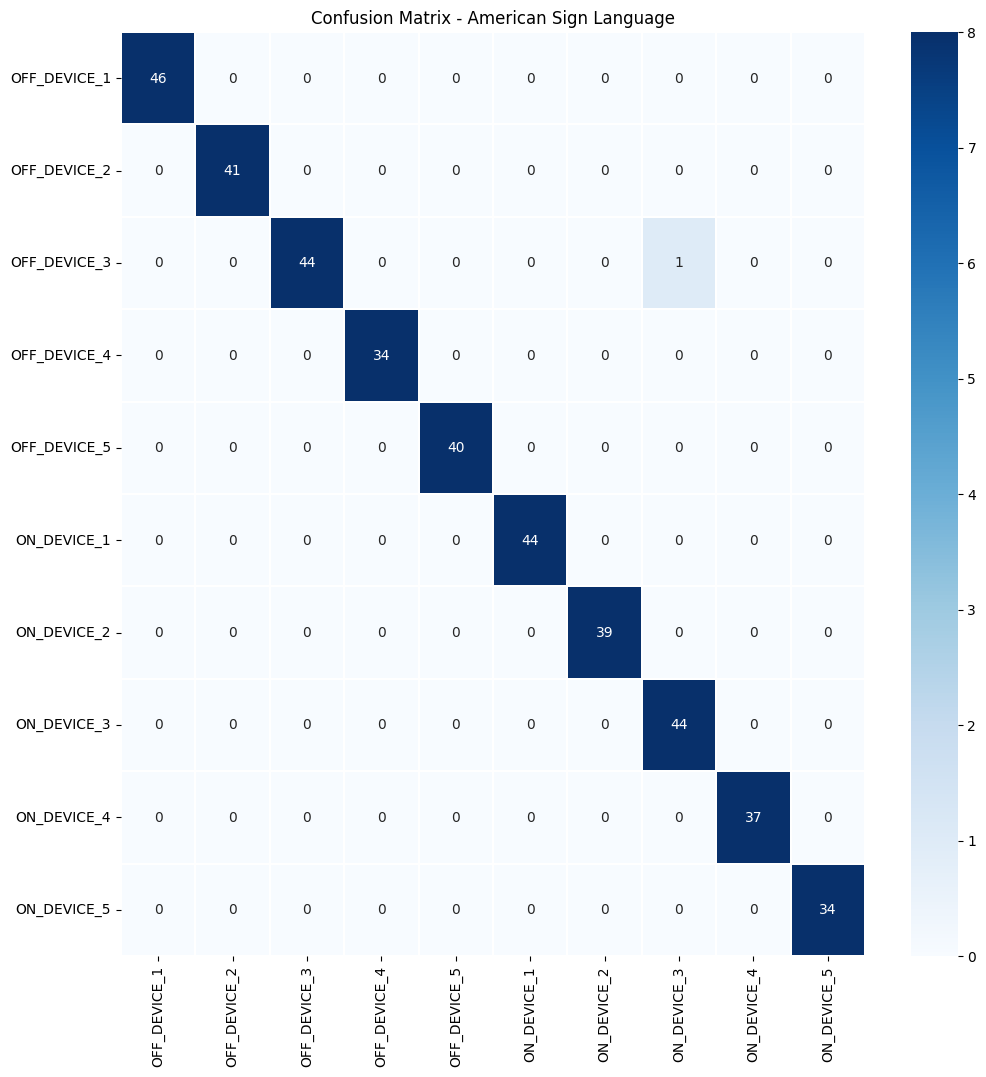

In [ ]:

labels = sorted(list(set(df['Output'])))
labels = [str(x).upper() for x in labels]  # Chuyển đổi thành chuỗi trước khi áp dụng upper()

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix,
                     annot=True,
                     cmap=plt.cm.Blues,
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels,
                     vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping


In [ ]:
import pickle

# save model
with open('FILEUP1.pkl','wb') as f:
    pickle.dump(svm,f)